In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

/home/ec2-user/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ec2-user/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ec2-user/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ec2-user/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
import random, json, ast

import torch
import dill as dill 
import PIL

from utils import *

In [3]:
PATH='data/dogscats/'

In [4]:
sz=224

In [5]:
model_file = f'{PATH}models/dogscats_resnext50.pt'

In [6]:
classes_file = f'{PATH}models/classes.json'

In [7]:
with open(classes_file) as f:
    classes = ast.literal_eval(json.load(f))

In [8]:
classes

['cats', 'dogs']

In [9]:
model = torch.load(model_file, pickle_module=dill).cpu()

In [10]:
def get_random_image(dir_name):
    file_name = dir_name + random.choice(os.listdir(dir_name)) 
    return file_name

In [68]:
file = get_random_image(f'{PATH}test1/'); file

'data/dogscats/test1/576.jpg'

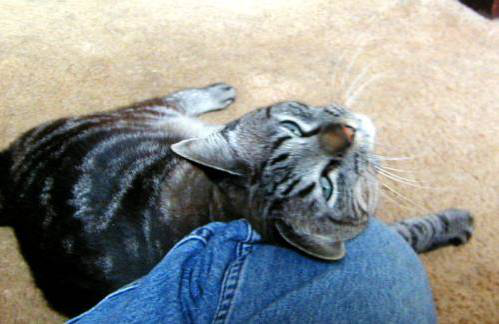

In [69]:
img = PIL.Image.open(file); img

In [70]:
test_img = open_image(file)
p_img = preproc_img(test_img, sz)
log_preds = model(p_img).data.numpy()

In [71]:
preds = np.argmax(np.exp(log_preds), axis=1)

In [72]:
probs_arr = np.exp(log_preds); probs_arr

array([[0.99861, 0.00139]], dtype=float32)

In [73]:
pred_class = classes[preds.item()]; pred_class

'cats'

In [74]:
confidence = np.exp(log_preds[:,preds.item()]).item(); confidence

0.9986108541488647